In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

### Importing the House Price Dataset



In [190]:
house_df = pd.read_csv('/content/home_data.csv')

In [191]:
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [192]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [193]:
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [194]:
# checking the number of rows and Columns in the data frame
house_df.shape

(21613, 21)

In [195]:
house_df.nunique()

,0
id,21436
date,372
price,4032
bedrooms,13
bathrooms,30
sqft_living,1038
sqft_lot,9782
floors,6
waterfront,2
view,5


In [196]:
# check for missing values
house_df.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [197]:
# statistical measures of the dataset
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Data Preprocessing

In [198]:
# changing float to integer
house_df['bathrooms'] = house_df['bathrooms'].astype(int)
house_df['floors'] = house_df['floors'].astype(int)
# renaming the column yr_built to age and changing the values to age
house_df.rename(columns={'yr_built':'age'},inplace=True)
house_df['age'] = 2023 - house_df['age']
# changing the column yr_renovated to renovated and changing the values to 0 and 1
house_df.rename(columns={'yr_renovated':'renovated'},inplace=True)
house_df['renovated'] = house_df['renovated'].apply(lambda x: 0 if x == 0 else 1)

In [199]:
# using simple feature scaling
house_df['sqft_living'] = house_df['sqft_living']/house_df['sqft_living'].max()
house_df['sqft_living15'] = house_df['sqft_living15']/house_df['sqft_living15'].max()
house_df['sqft_lot'] = house_df['sqft_lot']/house_df['sqft_lot'].max()
house_df['sqft_above'] = house_df['sqft_above']/house_df['sqft_above'].max()
house_df['sqft_basement'] = house_df['sqft_basement']/house_df['sqft_basement'].max()
house_df['sqft_lot15'] = house_df['sqft_lot15']/house_df['sqft_lot15'].max()

In [200]:
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,age,renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1,0.087149,0.003421,1,0,0,...,7,0.125399,0.000000,68,0,98178,47.5112,-122.257,0.215781,0.006485
1,6414100192,20141209T000000,538000,3,2,0.189808,0.004385,2,0,0,...,7,0.230606,0.082988,72,1,98125,47.7210,-122.319,0.272142,0.008768
2,5631500400,20150225T000000,180000,2,1,0.056869,0.006056,1,0,0,...,6,0.081828,0.000000,90,0,98028,47.7379,-122.233,0.438003,0.009254
3,2487200875,20141209T000000,604000,4,3,0.144756,0.003028,1,0,0,...,7,0.111583,0.188797,58,0,98136,47.5208,-122.393,0.219002,0.005739
4,1954400510,20150218T000000,510000,3,2,0.124077,0.004893,1,0,0,...,8,0.178533,0.000000,36,0,98074,47.6168,-122.045,0.289855,0.008612


## Exploratory Data Analysis
Correlation Matrix to find the relationship between the variables

### Understanding the correlation between various features in the dataset

1. Positive Correlation

2. Negative Correlation

In [201]:
# using correlation statistical method to find the relation between the price and other features
# The 'date' column is a string and cannot be converted to a float for correlation calculation.
# drop it before calculating the correlation matrix.
correlation = house_df.drop('date', axis=1).corr()
correlation['price'].sort_values(ascending=False)

,price
price,1.000000
sqft_living,0.702035
grade,0.667434
sqft_above,0.605567
sqft_living15,0.585379
bathrooms,0.510072
view,0.397293
sqft_basement,0.323816
bedrooms,0.308350
lat,0.307003


<Axes: >

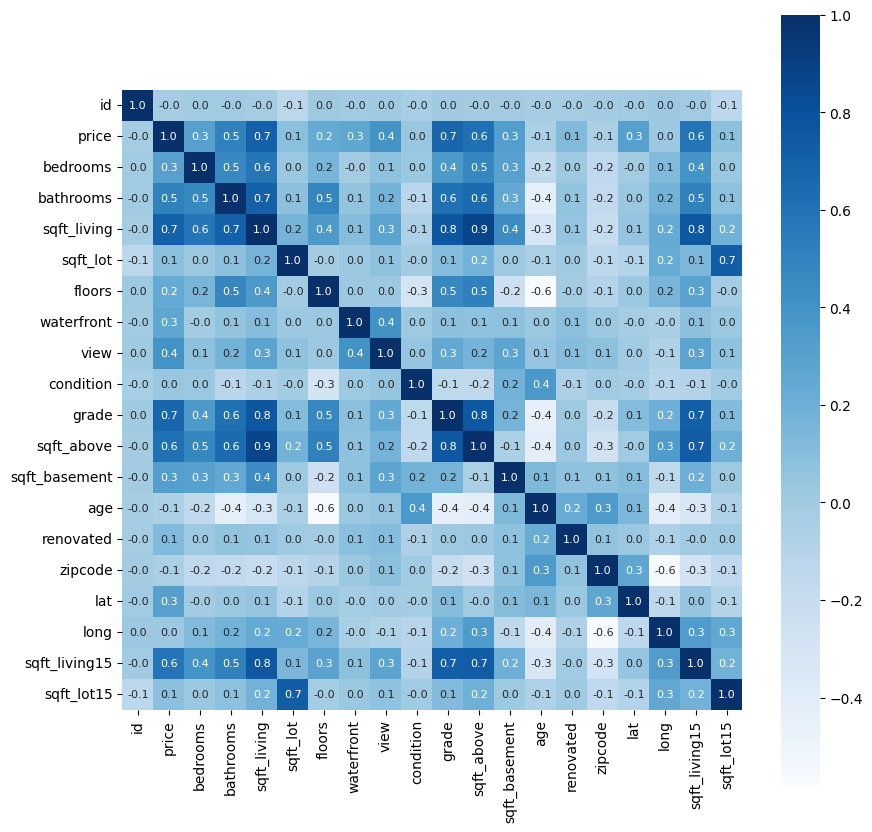

In [202]:
# constructing a heatmap to nderstand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

### Visualizing the coorelation with price

<Axes: >

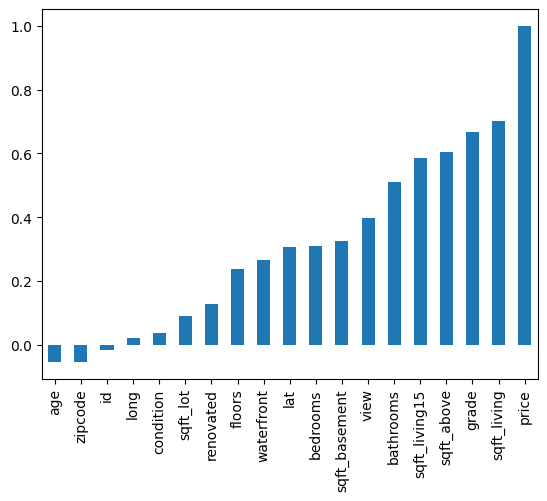

In [203]:
house_df.drop('date', axis=1).corr()['price'][:-1].sort_values().plot(kind='bar')

In [204]:
# adding a new column price_range and categorizing the price into 4 categories
# The 'price' column values are already scaled (e.g., 4.526 means $452,600).
# The original bins were for absolute dollar values, so they are too large for the scaled 'price' column.
# Let's define new bins based on the quantiles of the 'price' column to create balanced categories.

q1 = house_df['price'].quantile(0.25)
q2 = house_df['price'].quantile(0.50)
q3 = house_df['price'].quantile(0.75)
max_price = house_df['price'].max()

# Define bins using quantiles
bins = [0, q1, q2, q3, max_price + 0.00001] # Adding a small epsilon to ensure max value is included
labels = ['Low', 'Medium', 'High', 'Very High']

house_df['price_range'] = pd.cut(house_df['price'], bins=bins, labels=labels, include_lowest=True)

In [205]:
import folium
from folium.plugins import FastMarkerCluster

# Use the mean of Latitude and Longitude for initial map centering
map = folium.Map(location=[house_df['lat'].mean(), house_df['long'].mean()], zoom_start=8)
marker_cluster = FastMarkerCluster(house_df[['lat', 'long']].values.tolist()).add_to(map)
map

## Train/Test Split


In [206]:
X = house_df.drop(['price', 'price_range', 'date'], axis=1)
Y = house_df['price']

In [207]:
print(X)
print(Y)

               id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      7129300520         3          1     0.087149  0.003421       1   
1      6414100192         3          2     0.189808  0.004385       2   
2      5631500400         2          1     0.056869  0.006056       1   
3      2487200875         4          3     0.144756  0.003028       1   
4      1954400510         3          2     0.124077  0.004893       1   
...           ...       ...        ...          ...       ...     ...   
21608   263000018         3          2     0.112999  0.000685       3   
21609  6600060120         4          2     0.170606  0.003520       2   
21610  1523300141         2          0     0.075332  0.000818       2   
21611   291310100         3          2     0.118168  0.001446       2   
21612  1523300157         2          0     0.075332  0.000652       2   

       waterfront  view  condition  grade  sqft_above  sqft_basement  age  \
0               0     0          3      7    0

### Splitting the data into Training data and Test data

In [208]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [209]:
print(X.shape, X_train.shape, X_test.shape)

(21613, 19) (17290, 19) (4323, 19)


## Model Training

### XGBoost Regressor

In [210]:
# loading the model
model = XGBRegressor()

In [211]:
# training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [212]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [213]:
print(training_data_prediction)

[1740651.2   364077.75  667344.25 ... 1013368.06  320587.1   718365.56]


In [214]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9772560000419617
Mean Absolute Error :  39741.98046875


In [215]:
#training the model
model.fit(X_train, Y_train)
model.score(X_test,Y_test)

0.8970620036125183

In [216]:
#testing the model
pipe_pred = model.predict(X_test)
r2_score(Y_test, pipe_pred)

0.8970620036125183

Using pipeline to combine the transformers and estimators and fit the model

In [217]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

input = [('scale',StandardScaler()),('polynomial', PolynomialFeatures(degree=2)),('model',LinearRegression())]
pipe = Pipeline(input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('model', LinearRegression())])

In [218]:
#training the model
pipe.fit(X_train,Y_train)
pipe.score(X_test,Y_test)

0.8243963806325882

In [219]:
from sklearn.metrics import r2_score

#testing the model
pipe_pred = pipe.predict(X_test)
r2_score(Y_test, pipe_pred)

0.8243963806325882

### Ridge Regression

In [220]:
from sklearn.linear_model import Ridge
Ridgemodel = Ridge(alpha = 0.001)
Ridgemodel

Ridge(alpha=0.001)

In [221]:
# training the model
Ridgemodel.fit(X_train,Y_train)
Ridgemodel.score(X_test,Y_test)

#testing the model
r_pred = Ridgemodel.predict(X_test)
r2_score(Y_test,r_pred)

/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=5.46032e-27): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


0.7178709138577588

### Random Forest Regression

In [222]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor

RandomForestRegressor(random_state=0)

In [223]:
# training the model
regressor.fit(X_train,Y_train)
regressor.score(X_test,Y_test)

0.8758830375179375

In [224]:
#testing the model
yhat = regressor.predict(X_test)
r2_score(Y_test,yhat)

0.8758830375179375

## Model Evalution
Distribution plot from the models predictions and the actual values

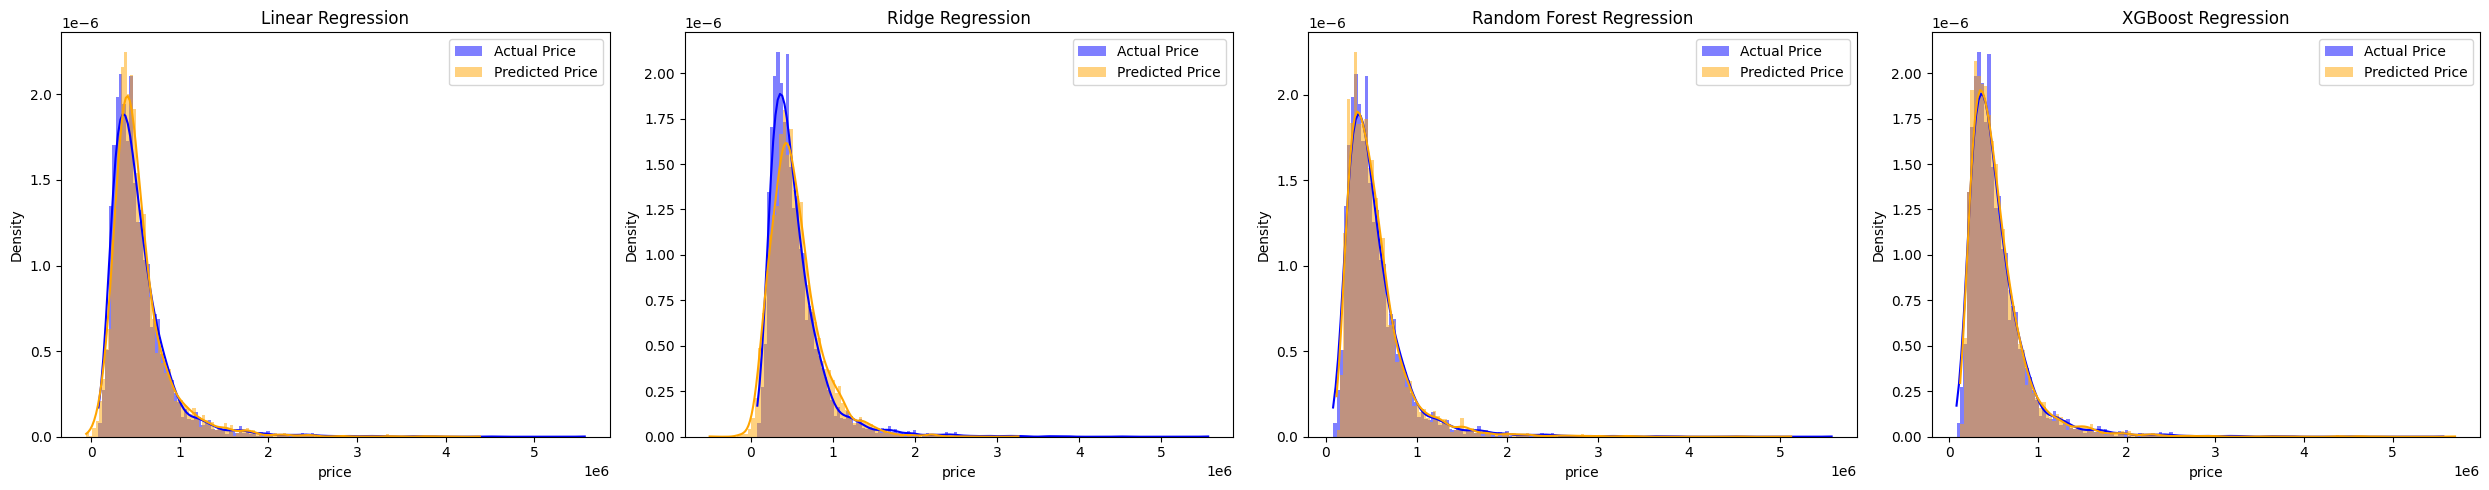

In [225]:
# displot of the actual price and predicted price for all models
fig, ax = plt.subplots(1,4,figsize=(25,5))
sns.histplot(Y_test,ax=ax[0], color='blue', label='Actual Price', kde=True, stat='density', linewidth=0)
sns.histplot(pipe_pred,ax=ax[0], color='orange', label='Predicted Price', kde=True, stat='density', linewidth=0)
sns.histplot(Y_test,ax=ax[1], color='blue', label='Actual Price', kde=True, stat='density', linewidth=0)
sns.histplot(r_pred,ax=ax[1], color='orange', label='Predicted Price', kde=True, stat='density', linewidth=0)
sns.histplot(Y_test,ax=ax[2], color='blue', label='Actual Price', kde=True, stat='density', linewidth=0)
sns.histplot(yhat,ax=ax[2], color='orange', label='Predicted Price', kde=True, stat='density', linewidth=0)
sns.histplot(Y_test,ax=ax[3], color='blue', label='Actual Price', kde=True, stat='density', linewidth=0)
sns.histplot(test_data_prediction,ax=ax[3], color='orange', label='Predicted Price', kde=True, stat='density', linewidth=0)

# legends
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()

#model name as title
ax[0].set_title('Linear Regression')
ax[1].set_title('Ridge Regression')
ax[2].set_title('Random Forest Regression')
ax[3].set_title('XGBoost Regression')

plt.tight_layout()
plt.show()

## Error Evaluation

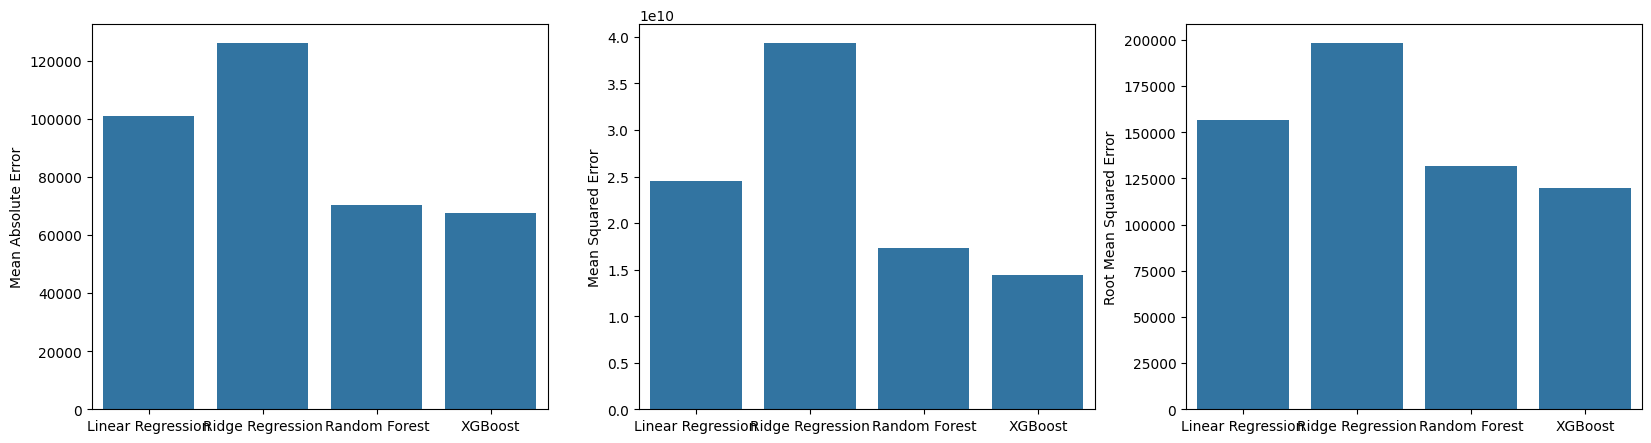

In [226]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

#plot the graph to compare mae, mse, rmse for all models
fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.barplot(x=['Linear Regression','Ridge Regression','Random Forest', 'XGBoost'],y=[mean_absolute_error(Y_test,pipe_pred),mean_absolute_error(Y_test,r_pred),mean_absolute_error(Y_test,yhat), mean_absolute_error(Y_test,test_data_prediction)],ax=ax[0])
sns.barplot(x=['Linear Regression','Ridge Regression','Random Forest', 'XGBoost'],y=[mean_squared_error(Y_test,pipe_pred),mean_squared_error(Y_test,r_pred),mean_squared_error(Y_test,yhat), mean_squared_error(Y_test,test_data_prediction)],ax=ax[1])
sns.barplot(x=['Linear Regression','Ridge Regression','Random Forest', 'XGBoost'],y=[np.sqrt(mean_squared_error(Y_test,pipe_pred)),np.sqrt(mean_squared_error(Y_test,r_pred)),np.sqrt(mean_squared_error(Y_test,yhat)), np.sqrt(mean_squared_error(Y_test,test_data_prediction))],ax=ax[2])
# label for the graph
ax[0].set_ylabel('Mean Absolute Error')
ax[1].set_ylabel('Mean Squared Error')
ax[2].set_ylabel('Root Mean Squared Error')
plt.show()

## Accuracy Evaluation

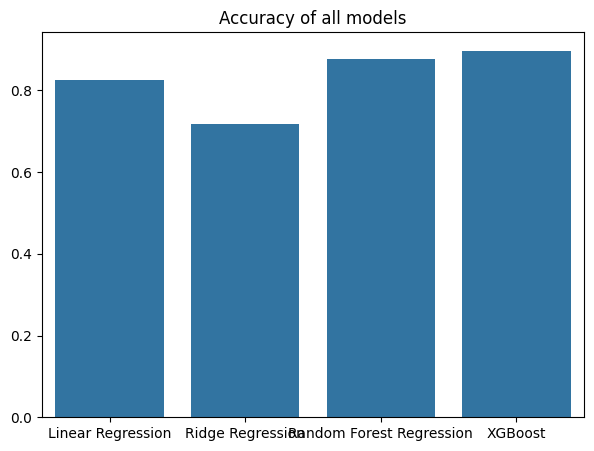

In [227]:
# plot accuracy of all models in the same graph
fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(x=['Linear Regression','Ridge Regression','Random Forest Regression', 'XGBoost'],y=[metrics.r2_score(Y_test,pipe_pred),metrics.r2_score(Y_test,r_pred),metrics.r2_score(Y_test,yhat), metrics.r2_score(Y_test,test_data_prediction)])
ax.set_title('Accuracy of all models')
plt.show()

## Visualizing the actual Prices and predicted prices

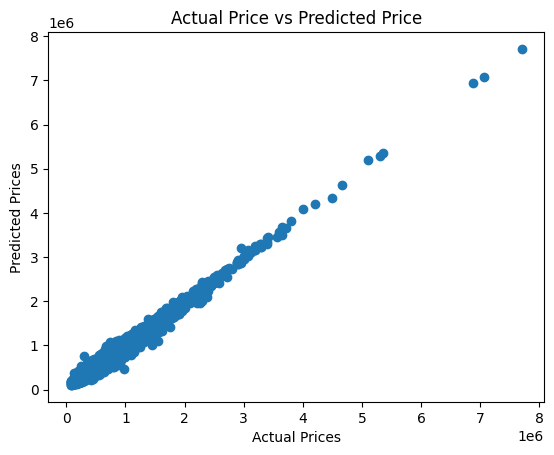

In [228]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [229]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [230]:
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.8970620036125183
Mean Absolute Error :  67419.4765625
